# Attempt to adjust sampling of classes we are interested in

In [57]:
import pandas as pd
import math
import json
import os
import numpy as np
from pprint import pprint as pp
from matplotlib import pyplot as plt
PROJ_NAME = "CNN_TOXIC"
LABELS = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

In [17]:
with open("/Users/AlexPowers/code/nlp-dl/config.json", "rb") as f:
    config = json.load(f) # load config
data_dir = os.path.join(config["data_dir"],PROJ_NAME)
model_dir = os.path.join(config["model_dir"],PROJ_NAME)
with open(os.path.join(data_dir,"stopwords.txt"), "r") as f:
    stopwords = f.readlines() # load stopwords                              
stopwords = set([i.split()[0] for i in stopwords]) # remove new line characters (\n) from strings
df = pd.read_csv(os.path.join(data_dir, "train.csv"))

['id',
 'comment_text',
 'toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate']


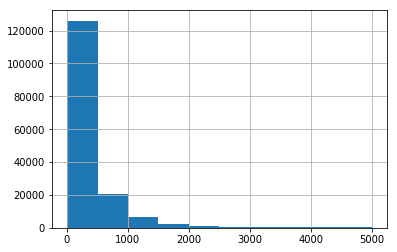

,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.073221
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.720282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,435.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000


In [18]:
pp(list(df.columns))
df['comment_length'] = df.comment_text.str.len()
df['comment_length'].hist()
plt.show()
df.describe()

In [79]:
def adjust_class_balance(df: pd.DataFrame, interested_labels, thresh):
    dfs = {}
    null = df.copy()
    for name in interested_labels:
        dfs[name] = df.loc[(df[name] == 1)]
        null.drop(null[null[name]==1].index,axis=0,inplace=True)
        
    print("NULL:", 100*(len(null)/len(df)))
    for name, d in dfs.items():
        print("Initial percentage of DF for", name, "is", 100*(len(d)/len(df)))
    
    print("Each label will now have at least", thresh*100,"% of the origional df size")
    adjusted_df = null.sample(int(thresh*len(df))) # get a subsample of null cases
    

    for n, d in dfs.items():
        i=0
        for times in range(math.ceil((thresh/(len(d)/len(df))+1))):
            adjusted_df = adjusted_df.append(d)
            i+=1
        print(n,"upsampled",i,"times")
    return adjusted_df
        
    

In [80]:
a_df = adjust_class_balance(df, LABELS, 1/(len(LABELS)+1))

NULL: 89.83211235124176
Initial percentage of DF for toxic is 9.584448302009765
Initial percentage of DF for severe_toxic is 0.9995550569965721
Initial percentage of DF for obscene is 5.2948217407925
Initial percentage of DF for threat is 0.2995531769557125
Initial percentage of DF for insult is 4.936360616904074
Initial percentage of DF for identity_hate is 0.8804858025581089
Each label will now have at least 14.285714285714285 % of the origional df size
toxic upsampled 3 times
severe_toxic upsampled 16 times
obscene upsampled 4 times
threat upsampled 49 times
insult upsampled 4 times
identity_hate upsampled 18 times


In [81]:
a_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
count,208213.000000,208213.000000,208213.000000,208213.000000,208213.000000,208213.000000,208213.000000
mean,0.854505,0.254446,0.671385,0.147719,0.653269,0.229448,326.510088
std,0.352600,0.435550,0.469711,0.354822,0.475931,0.420479,718.831294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,121.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,270.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000
